# XOR
#### 아래의 데이터를 neural networks에서 backcpropagation을 이용하여 학습시켜라
#### 2번째 코드, 편향 바이어스가 변하고 Error 함수 = $ -\log likeliwood $

In [9]:
import numpy as np
import matplotlib.pyplot as plt

X = [[0,0],[1,0],[0,1],[1,1]] #bias는 1
y = [0,1,1,0]

X=np.reshape(X,(4,2))
y=np.reshape(y,(4,1))

#### acitiavation 함수는 sigmoid 함수로 한다.

In [10]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

#### 외부 코드에 의해 parameter들이 바뀌지 않도록 초기화 시켜준다.

In [11]:
def initialize(inputs,hiddens,outputs):
    np.random.seed(1)
    w=2*np.random.random((inputs,hiddens))-1
    omega=2*np.random.random((hiddens,outputs))-1
    b1=np.array([[1]])
    b2=np.array([[1]])
    parameters={"w" : w, "b1": b1,
                "omega" : omega, "b2": b2}
    return parameters

#### 아래의 코드는 순전파 과정이다. Error 함수를 likeli 함수에 로그를 씌운 뒤, 부호를 바꾼 것을 사용하였다.

In [12]:
def feedforward(X,y,parameters):
    m = X.shape[0]
    w = parameters["w"]
    omega = parameters["omega"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    
    h=sigmoid(np.dot(X,w)+b1)
    o=sigmoid(np.dot(h,omega)+b2)
    
    cache = (h, o, b1, b2, w, omega)
    loglikeli = np.log(o) * y + np.log(1 - o) * (1 - y)
    cost = -np.sum(loglikeli) / m
    return cost, cache, o


In [13]:
def BackPropagation(X,y,cache):
    m = X.shape[0]
    (h, o, b1, b2, w, omega) = cache
    
    deltao = o - y 
    domega = np.dot(h.T, deltao) / m  
    db2 = np.sum(deltao, axis=1,keepdims=True)
    
    deltah = np.dot(deltao, omega.T) * h * (1 - h)
    dw = np.dot(X.T, deltah)/m
    db1 = np.sum(deltah, axis = 1, keepdims = True) / m
    
    gradients = {"domega": domega, "db2": db2,
                 "dw": dw, "db1": db1}
    return gradients


In [14]:
def gradientdescent(parameters, gradient, eta):
    parameters["omega"] = parameters["omega"] - eta * gradients["domega"]
    parameters["w"] = parameters["w"] - eta * gradients["dw"]
    parameters["b1"] = parameters["b1"] - eta * gradients["db1"]
    parameters["b2"] = parameters["b2"] - eta * gradients["db2"]
    return parameters

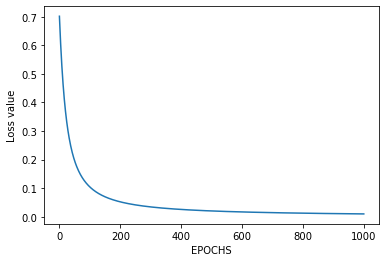

[[0.00929983]
 [0.98946513]
 [0.98967175]
 [0.00947241]]


In [15]:
inputs,hiddens,outputs = 2,3,1
eta=0.1
epoch=1000
costs=np.zeros([epoch,1])
parameters=initialize(inputs,hiddens,outputs)

a,b,c=feedforward(X,y,parameters)

for i in range(epoch):
    costs[i, 0], cache, A2 = feedforward(X, y, parameters)
    gradients = BackPropagation(X, y, cache)
    parameters = gradientdescent(parameters, gradients, eta)
    
plt.figure()
plt.plot(costs)
plt.xlabel("EPOCHS")
plt.ylabel("Loss value")
plt.show()

cost, cache,pred = feedforward(X,y,parameters)
print(pred)

#### epoch가 늘어날 수록 error가 줄어드는 것을 확인할 수 있었고, target값과 예측한 y값이 비슷하다는 것을 알 수 있었다.

In [16]:
cache[2],cache[3],cache[4],cache[5] #bias 1, bias2, w, omega

(array([[1.28350429],
        [0.65699555],
        [0.61959951],
        [1.35564169]]),
 array([[-3.38821008],
        [ 5.5477747 ],
        [ 5.39267768],
        [-3.60400603]]),
 array([[-0.16208015,  0.45643099, -1.00679185],
        [-0.39753917, -0.72407405, -0.82029146]]),
 array([[-0.7863227 ],
        [-0.4890613 ],
        [-0.35952118]]))

In [19]:
c

array([[0.54103979],
       [0.55219063],
       [0.5755456 ],
       [0.58575972]])